### 特征工程
- 特征抽取
- 数据特征的预处理
- 特征选择

- 为什么需要特征工程
    - 样本数据中的特征有可能会存在缺失值，重复值，异常值等等，那么我们是需要对特征中的相关的噪点数据进行处理的，那么处理的目的就是为了营造出一个更纯净的样本集（数据集越纯净则越便于让模型总结出数据集中潜在的规律），让模型基于这组数据可以有更好的预测能力。当然特征工程不是单单只是处理上述操作！

- 什么是特征工程
    - 特征工程是将原始数据转换为更好的能代表模型能够处理数据的潜在问题对应特征的过程，从而提高对未知数据预测的准确性。所以特征工程就是对特征的相关处理！
        - 比如AlphaGo学习的数据中既有棋谱，又有食谱还有歌词，那么一些干扰的数据绝对会影响AlphaGo的学习。

- 特征工程的意义
    - 直接影响模型预测的结果

- 如何实现特征工程
    - 工具：sk-learn

- sklean介绍
    - 是python语言中的机器学习工具，包含了很多知名的机器学习算法的实现，其文档完善，容易上手。
    - 功能：
        - 分类模型
        - 回归模型
        - 聚类模型
        - 特征工程

### 特征抽取

- 目的：
    - 二进制计算机最本质的作用：
        - 存储和运算二进制数据。
    - 我们所采集到样本中的特征数据往往很多时候为字符串或者其他类型的数据，我们知道电脑只可以识别二进制数值型的数据，如果把字符串给电脑，电脑是看不懂的。机器学习学习的数据如果不是数值型的数据，它是识别不了的。

- 特征值化：将非数值型的特征转换成数值形式的特征。

- 效果演示：
    - 将字符串转换成数字

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
res = vector.fit_transform(
        [
         'lift is short,i love python',
         'lift is too long,i hate python'
        ]
    )
print(res.toarray())

[[0 1 1 0 1 1 1 0]
 [1 1 1 1 0 1 0 1]]


- 演示后的结论：
    - 特征抽取对文本等数据进行特征值化。特征值化是为了让机器更好的理解数据。

#### 字典特征抽取
    - 作用：对字典数据进行特征值化
    - API：from sklearn.feature_extraction import DictVectorizer
        - fit_transform(X):X为字典或者包含字典的迭代器，返回值为sparse矩阵
        - inverse_transform(X)：X为sparse矩阵或者array数组，返回值为转换之前的数据格式
        - get_feature_names()：返回类别名称

In [3]:
from sklearn.feature_extraction import DictVectorizer
alist = [
            {'city':'BeiJing','temp':33},
            {'city':'GZ','temp':42},
            {'city':'SH','temp':40}
        ]
d = DictVectorizer() #1.实例化工具对象
#该方法的返回值就是特征值化之后的结果
result = d.fit_transform(alist) #2.调用指定方法对原始数据进行特征值化
print(result)

  (0, 0)	1.0
  (0, 3)	33.0
  (1, 1)	1.0
  (1, 3)	42.0
  (2, 2)	1.0
  (2, 3)	40.0


- 什么是sparse矩阵如何理解？
    - 在DictVectorizer类的构造方法中中设定sparse=False则返回的就不是sparse矩阵，而是一个数组。
        - get_feature_names()：返回类别名称
    - sparse矩阵就是一个变相的数组或者列表，目的是为了节省内存

In [5]:
alist = [
            {'city':'BeiJing','temp':33},
            {'city':'GZ','temp':42},
            {'city':'SH','temp':40}
        ]
d = DictVectorizer(sparse=False)
result = d.fit_transform(alist) 
print(d.get_feature_names())
print(result)

['city=BeiJing', 'city=GZ', 'city=SH', 'temp']
[[ 1.  0.  0. 33.]
 [ 0.  1.  0. 42.]
 [ 0.  0.  1. 40.]]


- OneHot编码
    - sparse矩阵中的0and1就是onehot编码
    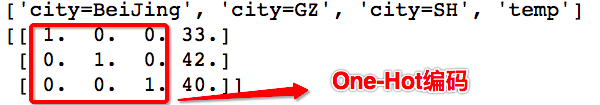

- 为什么需要onehot编码呢？
    - 特征抽取主要目的就是对非数值型的数据进行特征值化！如果现在需要对下图中的human和alien进行手动特征值化Alien为4，human为1。则1和4有没有优先级或者权重大小之分呢？
    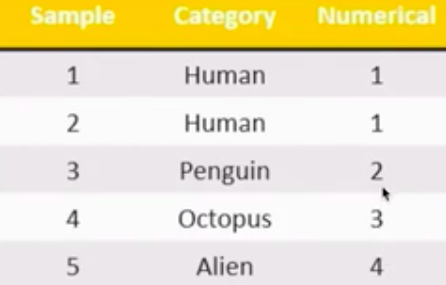
    - 则就需要对其进行One-Hot编码：

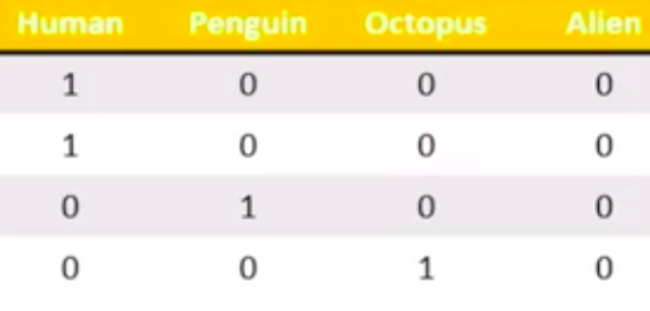

- 基于pandas实现one-hot编码
    - pd.get_dummies(df['col'])

In [3]:
df = pd.DataFrame([
 ['green', 'M', 20, 'class1'],
 ['red', 'L', 21, 'class2'],
 ['blue', 'XL',30, 'class3']])
df.columns = ['color', 'size', 'weight', 'class label']

NameError: name 'pd' is not defined

#### 文本特征抽取
    - 作用：对文本数据进行特征值化
    - API:from sklearn.feature_extraction.text import CountVectorizer
    - fit_transform(X):X为文本或者包含文本字符串的可迭代对象，返回sparse矩阵
    - inverse_transform(X)：X为array数组或者sparse矩阵，返回转换之前的格式数据
    - get_feature_names()
    - toarray()：将sparse矩阵换成数组

In [4]:
alist = [
         'left is is short,i love python',
         'left is too long,i hate python'
        ]


- 中文文本特征抽取
    - 对有标点符号的中文文本进行特征抽取

In [5]:
alist = ['人生苦短,我用Python','人生漫长,不用Python']


- 对有标点符合且有空格分隔的中文文本进行特征处理

In [6]:
alist = ['人生 苦短，我 用Python','人生 漫长，不用 Python']


- 目前CountVectorizer只可以对有标点符号和用分隔符对应的文本进行特征抽取，显然这是满足不了我们日常需求的：
    - 因为在自然语言处理中，我们是需要将一段中文文本中相关的词语，成语，形容词......都要进行抽取的

- jieba分词
    - 对中文文章进行分词处理
    - pip install jieba

- jieba分词的基本使用

#### 特征的预处理：对数值型的数据进行处理
- 无量纲化：
    - 在机器学习算法实践中，我们往往有着将不同规格的数据转换到同一规格，或不同分布的数据转换到某个特定分布的需求这种需求统称为将数据“无量纲化”。
        - 譬如梯度和矩阵为核心的算法中，譬如逻辑回归，支持向量机，神经 网络，无量纲化可以加快求解速度;
        - 而在距离类模型，譬如K近邻，K-Means聚类中，无量纲化可以帮我们提升模型精度，避免某一个取值范围特别大的特征对距离计算造成影响。
        - 一个特例是决策树和树的集成算法们，对决策 树我们不需要无量纲化，决策树可以把任意数据都处理得很好。
    - 那么预处理就是用来实现无量纲化的方式。
- 含义：特征抽取后我们就可以获取对应的数值型的样本数据啦，然后就可以进行数据处理了。
- 概念：通过特定的统计方法（数学方法），将数据转换成算法要求的数据
- 方式：
    - 归一化
    - 标准化

- 案例分析：
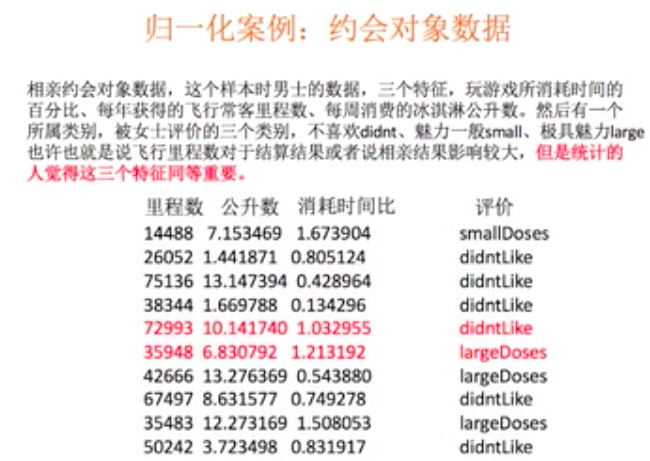

- 如果认为每一个特征具有同等大小的权重都同等重要，则必须要对其进行归一化处理。
- 可以使用KNN的算法对特征影响进行说明！！

- 归一化的实现：
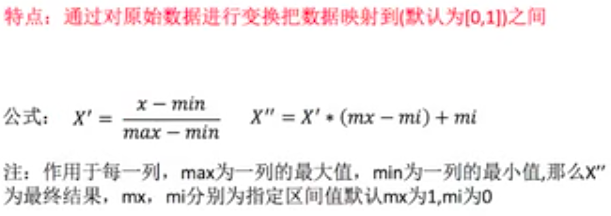
    - 归一化后的数据服从正太分布。

- API:from sklearn.preprocessing import MinMaxScaler
     - 参数：feature_range表示缩放范围，通常使用(0,1)
- 作用：使得某一个特征对最终结果不会造成很大的影响

- 问题：如果数据中存在的异常值比较多，会对结果造成什么样的影响？
    - 结合着归一化计算的公式可知，异常值对原始特征中的最大值和最小值的影响很大，因此也会影响对归一化之后的值。这个也是归一化的一个弊端，无法很好的处理异常值。
- 归一化总结：
    - 在特定场景下最大值和最小值是变化的，另外最大最小值很容易受到异常值的影响，所以这种归一化的方式具有一定的局限性。因此引出了一种更好的方式叫做：标准化！！！

- 标准化的处理
    - 当数据按均值中心化后，再按标准差缩放，数据就会服从为均值为0，方差为1的正态分布(即标准正态分 布)，而这个过程，就叫做数据标准化(Standardization，又称Z-score normalization)，公式如下
    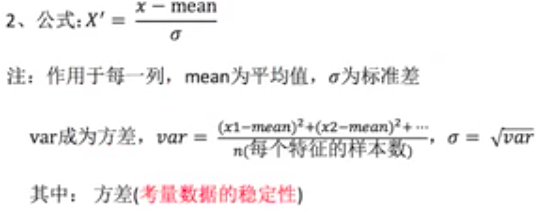
    - 从公式中可以看出，异常值对均值和标准差的影响不大

- API
    - 处理后，每列所有的数据都聚集在均值为0，标准差为1范围附近
    - 标准化API:from sklearn.preprocessing import StandardScaler
        - fit_transform(X):对X进行标准化
        - mean_：均值
        - var_:方差

- 归一化和标准化总结：
    - 对于归一化来说，如果出现了异常值则会响应特征的最大最小值，那么最终结果会受到比较大影响
    - 对于标准化来说，如果出现异常点，由于具有一定的数据量，少量的异常点对于平均值的影响并不大，从而标准差改变比较少。

- StandardScaler和MinMaxScaler选哪个? 
    - 看情况。大多数机器学习算法中，会选择StandardScaler来进行特征缩放，因为MinMaxScaler对异常值非常敏感。在PCA，聚类，逻辑回归，支持向量机，神经网络这些算法中，StandardScaler往往是最好的选择。 MinMaxScaler在不涉及距离度量、梯度、协方差计算以及数据需要被压缩到特定区间时使用广泛，比如数字图像处理中量化像素强度时，都会使用MinMaxScaler将数据压缩于[0,1]区间之中。
    - 建议先试试看StandardScaler，效果不好换MinMaxScaler。

#### 特征选择：从特征中选择出有意义对模型有帮助的特征作为最终的机器学习输入的数据！
- 切记：
    - 在做特征选择之前，有三件非常重要的事:跟数据提供者联系，跟数据提供者沟通，跟数据提供者开会。
    - 一定要抓住给你提供数据的人，尤其是理解业务和数据含义的人，跟他们聊一段时间。技术能够让模型起飞，前提是你和业务人员一样理解数据。所以特征选择的第一步，其实是根据我们的目标，用业务常识来选择特征。
- 特征选择的原因：
    - 冗余：部分特征的相关度高，容易消耗计算机的性能
    - 噪点：部分特征对预测结果有偏执影响
- 特征选择的实现：
    - 人为对不相关的特征进行主观舍弃
    - 当然了，在真正的数据应用领域，比如金融，医疗，电商，我们的数据特征非常多，这样明显，那如果遇见极端情况，我们无法依赖对业务的理解来选择特征，该怎么办呢?
        - 在已有特征和对应预测结果的基础上，使用相关的工具过滤掉一些无用或权重较低的特征
            - 工具：
                - Filter（过滤式）【主要讲解】
                - Embedded（嵌入式）：决策树模型会自己选择出对其重要的特征。【后期在讲解模型的时候在补充】
                - PCA降维

- Filter过滤式（方差过滤）：
    - 原理：这是通过特征本身的方差来筛选特征的类。比如一个特征本身的方差很小，就表示样本在这个特征上基本没有差异，可能特征中的大多数值都一样，甚至整个特征的取值都相同，那这个特征对于样本区分没有什么作用。所以无论接下来的特征工程要做什么，都要优先消除方差为0或者方差极低的特征。
        - 比如：朝阳区的房价预测，其中样本有一列特征为温度，则要知道朝阳区包含在样本中的房子对应的气象温度几乎一致或者大同小异，则温度特征则对房价的区分是无意义的。
    - API:from sklearn.feature_selection import VarianceThreshold
    - VarianceThreshold(threshold=x)threshold方差的值，删除所有方差低于x的特征，默认值为0表示保留所有方差为非0的特征
    - fit_transform(X)#:X为特征

- 特征的维度：
    - 特征的种类

- 如果将方差为0或者方差极低的特征去除后，剩余特征还有很多且模型的效果没有显著提升则方差也可以帮助我们将特征选择【一步到位】。留下一半的特征，那可以设定一个让特征总数减半的方差阈值，只要找到特征方差的中位数，再将这个中位数作为参数 threshold的值输入就好了。
    - VarianceThreshold(np.median(X.var().values)).fit_transform(X)
        - X为样本数据中的特征列

- 方差过滤对模型的影响
    - 我们这样做了以后，对模型效果会有怎样的影响呢?在这里，我为大家准备了KNN在方差过滤前和方差过滤后运行的效果和运行时间的对比。KNN是K近邻算法中的分类算法，其原理非常简单，是利用每个样本到其他样本点的距离来判断每个样本点的相似度，然后对样本进行分类。KNN必须遍历每个特征和每个样本，因而特征越多，KNN的计算也就会越缓慢。由于这一段代码对比运行时间过长，所以我为大家贴出了代码和结果：

- 方差过滤前：
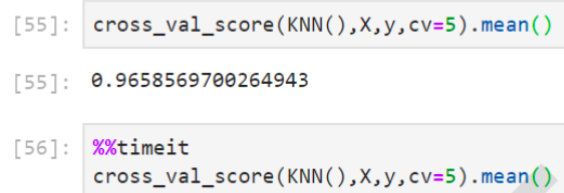

- 方差过滤后

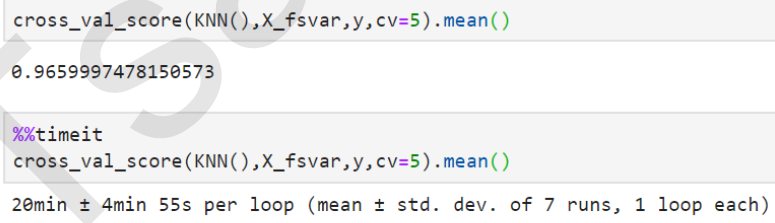

- 可以看出，对于KNN，过滤后的效果十分明显:准确率稍有提升，但平均运行时间减少了10分钟，特征选择过后算 法的效率上升了1/3.
- 【注意】
    - 方差过滤主要服务的对象是：需要遍历特征的算法模型。
    - 而过滤法的主要目的是:在维持算法表现的前提下，帮助算法们降低计算成本。

#### PCA降维（主成分分析）：是一种分析，简化数据集的技术
- 降维的维度值的就是特征的种类。
- 思想：如何最好的对一个立体的物体用二维表示
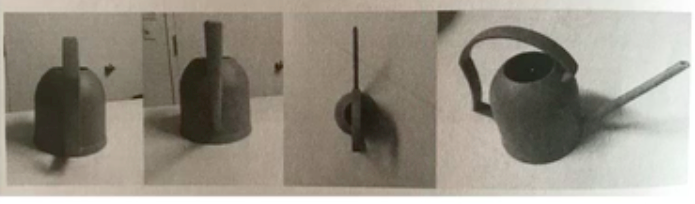
- 当然，第四张二维图片可以比较好的标识一个立体三维的水壶。但是也要清楚，用一个低纬度去表示高纬度的物体时，一定会造成一些信息的差异。可以让低纬度也可以能正确的表示高纬度的事物，或者信息差异最小。
- 目的：特征数量达到上百，上千的时候，考虑数据的优化。使数据维度压缩，尽可能降低源数据的维度（复杂度），损失少量信息。
- 作用：可以削减回归分析或者聚类分析中特征的数量

- PCA大致原理
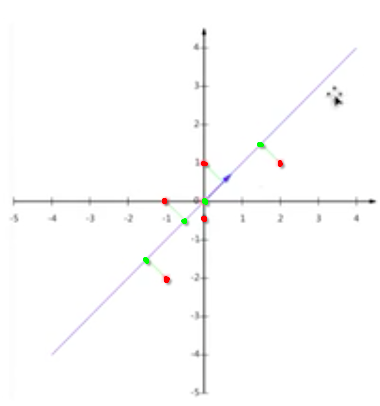
- 红色为原始的样本特征，为二维的特征，如果降为一维，则可以将5个红色的原始特征，映射到一维的线段上就变成了4个特征。
- PCA语法
    - from sklearn.decomposition import PCA
    - pca = PCA(n_components=None)
        - n_components可以为小数（保留特征的百分比），整数（减少到的特征数量）
    - pca.fit_transform(X)

In [7]:
data = [[0,2,4,3],[0,3,7,3],[0,9,6,3]]